In [90]:
import pandas as pd

In [91]:
# Load the datasets
results = pd.read_csv('input/results.csv')
shootouts = pd.read_csv('input/shootouts.csv')
goalscorers = pd.read_csv('input/goalscorers.csv')


In [92]:
df = results.copy()

In [93]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(columns=['date'])

In [94]:
df = pd.get_dummies(df, columns=['home_team', 'away_team', 'tournament', 'city', 'country'], drop_first=True)
#bool_columns = df.select_dtypes(include=['bool']).columns
#df[bool_columns] = df[bool_columns].astype(int)
df

,home_score,away_score,neutral,year,month,day,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,...,country_Western Samoa,country_Yemen,country_Yemen AR,country_Yemen DPR,country_Yugoslavia,country_Zambia,country_Zanzibar,country_Zaïre,country_Zimbabwe,country_Éire
0,0.0,0.0,False,1872,11,30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,2.0,False,1873,3,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,False,1874,3,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,False,1875,3,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,0.0,False,1876,3,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47121,NaN,NaN,True,2024,7,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47122,NaN,NaN,True,2024,7,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47123,NaN,NaN,True,2024,7,9,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47124,NaN,NaN,True,2024,7,10,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
nan_columns = df.columns[df.isnull().any()].tolist()
nan_columns

['home_score', 'away_score']

In [96]:
df = df.dropna()
df

,home_score,away_score,neutral,year,month,day,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,...,country_Western Samoa,country_Yemen,country_Yemen AR,country_Yemen DPR,country_Yugoslavia,country_Zambia,country_Zanzibar,country_Zaïre,country_Zimbabwe,country_Éire
0,0.0,0.0,False,1872,11,30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,2.0,False,1873,3,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1.0,False,1874,3,7,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2.0,2.0,False,1875,3,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.0,0.0,False,1876,3,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47070,0.0,1.0,False,2024,3,26,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47071,1.0,0.0,True,2024,3,26,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47072,2.0,0.0,False,2024,3,26,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
47073,3.0,3.0,False,2024,3,26,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
df["home_win"] = df.apply(lambda x: True if x["home_score"] > x["away_score"] else False, axis=1)

C:\Users\de130063\AppData\Local\Temp\ipykernel_3164\1024211802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["home_win"] = df.apply(lambda x: True if x["home_score"] > x["away_score"] else False, axis=1)


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm
from sklearn import metrics

In [99]:
X = df.drop(columns=["home_win", "home_score", "away_score"])
y = df["home_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5606,  393],
       [5370,  400]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

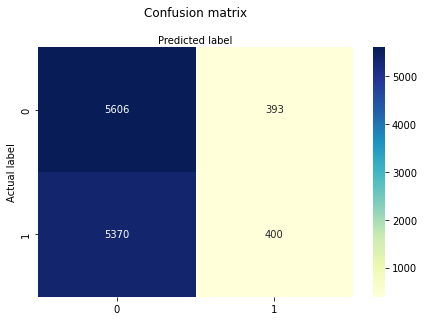

In [100]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')